In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Análise Exploratória

## 1. Coleta de dados

In [162]:
df = pd.read_csv('./ecommerce_preparados.csv', index_col=0) # Lê o arquivo CSV e define a primeira coluna como índice
df.head() #Exibindo as primeiras linhas do DataFrame

,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,...,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...",...,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...",...,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,Vendo comentários de outros consumidores vejo ...,...,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...","E o tamanho certo, mas em baixo dela, fica mui...",...,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,"Recomendo, tecido confortável, igual a foto.",...,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


## 2. Verificação inicial

In [163]:
df.columns # Exibe o nome de todas as colunas do DataFrame

Index(['Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material',
       'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3', 'Qtd_Vendidos',
       'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto_MinMax',
       'Preço_MinMax', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod',
       'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq'],
      dtype='object')

In [164]:
df.shape # Mostrando a quantidade de linhas e colunas

(2199, 23)

In [165]:
df.info() # Verificando os tipos de dados e valores ausentes

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2206
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Título               2199 non-null   object 
 1   Nota                 1559 non-null   float64
 2   N_Avaliações         1559 non-null   float64
 3   Desconto             874 non-null    float64
 4   Marca                2199 non-null   object 
 5   Material             1332 non-null   object 
 6   Gênero               2120 non-null   object 
 7   Temporada            2199 non-null   object 
 8   Review1              1515 non-null   object 
 9   Review2              1354 non-null   object 
 10  Review3              1233 non-null   object 
 11  Qtd_Vendidos         2199 non-null   object 
 12  Preço                1964 non-null   float64
 13  Nota_MinMax          1559 non-null   float64
 14  N_Avaliações_MinMax  1559 non-null   float64
 15  Desconto_MinMax      874 non-null    float6

In [166]:
df.describe() # Exibindo estatísticas descritivas das variáveis numéricas

,Nota,N_Avaliações,Desconto,Preço,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
count,1559.000000,1559.000000,874.000000,1964.000000,1559.000000,1559.000000,874.000000,1964.000000,2199.000000,2199.000000,2199.000000,1973.000000,2199.000000,1332.000000
mean,4.560936,204.062219,15.457666,102.705713,0.837384,0.022374,0.171437,0.156587,440.440655,118.055935,3.418372,728.044602,0.006109,0.080198
std,0.362854,578.455265,10.929166,69.976425,0.134390,0.063735,0.179167,0.119328,237.064233,60.987133,2.714090,3621.819900,0.009910,0.073812
min,2.300000,1.000000,5.000000,10.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,0.000455
25%,4.400000,8.000000,8.000000,50.192500,0.777778,0.000771,0.049180,0.067038,239.500000,62.500000,1.000000,5.000000,0.000910,0.005457
50%,4.600000,27.000000,11.000000,78.970000,0.851852,0.002865,0.098361,0.116111,463.000000,122.000000,3.000000,50.000000,0.001819,0.030014
75%,4.800000,119.500000,20.000000,139.152500,0.925926,0.013056,0.245902,0.218738,642.500000,178.000000,7.000000,100.000000,0.007731,0.176444
max,5.000000,9077.000000,66.000000,597.300000,1.000000,1.000000,1.000000,1.000000,841.000000,178.000000,9.000000,50000.000000,0.042292,0.176444


In [167]:
df.nunique() # Verificando a quantidade de valores únicos em cada coluna

Título                 1857
Nota                     25
N_Avaliações            345
Desconto                 50
Marca                   842
Material                178
Gênero                   13
Temporada                10
Review1                1225
Review2                1086
Review3                 938
Qtd_Vendidos             14
Preço                  1033
Nota_MinMax              25
N_Avaliações_MinMax     345
Desconto_MinMax          50
Preço_MinMax           1033
Marca_Cod               842
Material_Cod            179
Temporada_Cod            10
Qtd_Vendidos_Cod         12
Marca_Freq               26
Material_Freq            20
dtype: int64

In [168]:
df['Gênero'].unique() # Exibindo os valores únicos da coluna 'Gênero'

array(['Sem gênero', 'Masculino', 'Feminino', 'Sem gênero infantil',
       'Meninas', 'Bebês', 'Meninos', nan, 'Unissex',
       'short menina verao look mulher', 'Mulher',
       'roupa para gordinha pluss P ao 52', 'menino',
       'bermuda feminina brilho Blogueira'], dtype=object)

In [169]:
print(df.isnull().sum()) # Identificar valores nulos

Título                    0
Nota                    640
N_Avaliações            640
Desconto               1325
Marca                     0
Material                867
Gênero                   79
Temporada                 0
Review1                 684
Review2                 845
Review3                 966
Qtd_Vendidos              0
Preço                   235
Nota_MinMax             640
N_Avaliações_MinMax     640
Desconto_MinMax        1325
Preço_MinMax            235
Marca_Cod                 0
Material_Cod              0
Temporada_Cod             0
Qtd_Vendidos_Cod        226
Marca_Freq                0
Material_Freq           867
dtype: int64


## 3. Tratar Valores Nulos

### 3.1 Variáveis Numéricas

In [170]:
# Substitui valores nulos por 0 nessas colunas
df[['Nota', 'N_Avaliações', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto', 'Desconto_MinMax', 'Qtd_Vendidos_Cod', 'Material_Freq']] = df[['Nota', 'N_Avaliações', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto', 'Desconto_MinMax', 'Qtd_Vendidos_Cod', 'Material_Freq']].fillna(0)
 # Substitui valores nulos pela mediana nas colunas de preço
df[['Preço', 'Preço_MinMax']] = df[['Preço', 'Preço_MinMax']].fillna(df[['Preço', 'Preço_MinMax']].median())

### 3.2 Variáveis Categóricas

In [171]:
df.fillna({'Material': 'Desconhecido'}, inplace=True) # Substitui valores nulos na coluna 'Material' por 'Desconhecido'
df[['Gênero']] = df[['Gênero']].fillna('Não informado') # Substitui valores nulos na coluna 'Gênero' por 'Não informado'

# Substitui valores nulos nas colunas de review por 'Sem Review'
for col in ['Review1', 'Review2', 'Review3']:
    df[col] = df[col].fillna('Sem Review')

In [172]:
print(df.isnull().sum()) # Identificar dados faltantes

Título                 0
Nota                   0
N_Avaliações           0
Desconto               0
Marca                  0
Material               0
Gênero                 0
Temporada              0
Review1                0
Review2                0
Review3                0
Qtd_Vendidos           0
Preço                  0
Nota_MinMax            0
N_Avaliações_MinMax    0
Desconto_MinMax        0
Preço_MinMax           0
Marca_Cod              0
Material_Cod           0
Temporada_Cod          0
Qtd_Vendidos_Cod       0
Marca_Freq             0
Material_Freq          0
dtype: int64


## 4. Visualização de Dados

### 4.1 Histogramas

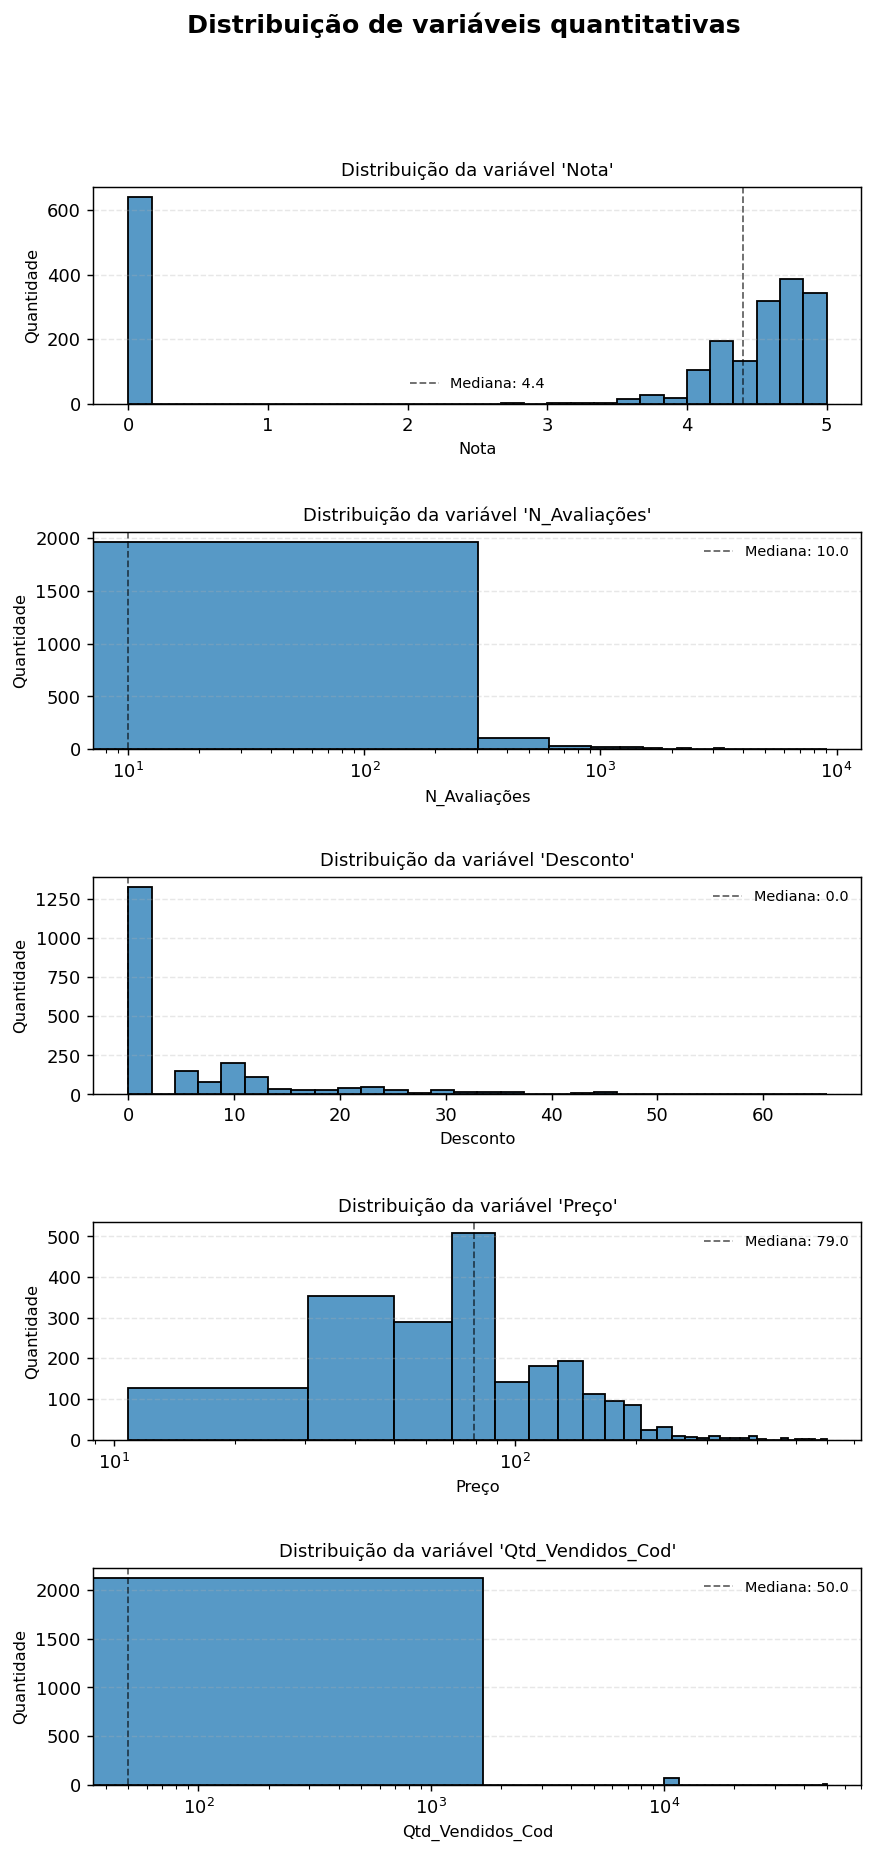

In [173]:
fig, axes = plt.subplots(5, 1, figsize=(8,15), dpi=130, sharey='row')  # Cria uma figura com 5 subplots verticais (5 linhas, 1 coluna)
plt.tight_layout(rect=[0, 0, 1, 0.95], pad=6, w_pad=10, h_pad=5)  # Ajusta o espaçamento entre os gráficos
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold', fontsize=14)  # Título principal da figura

axs = axes.flatten()  # Transforma o array de eixos em uma lista simples
quantitative_columns = ['Nota', 'N_Avaliações', 'Desconto', 'Preço', 'Qtd_Vendidos_Cod']  # Lista das variáveis quantitativas
log_x_cols = ['Preço', 'N_Avaliações', 'Qtd_Vendidos_Cod']  # Variáveis que terão escala logarítmica no eixo X

for i, variavel in enumerate(quantitative_columns):  # Loop sobre as variáveis quantitativas
    ax = sns.histplot(  # Cria um histograma para cada variável
        data=df,
        x=variavel,
        ax=axs[i],
        bins=30
    )
    if variavel in log_x_cols:
        ax.set_xscale('log')  # Aplica escala logarítmica no eixo X, se estiver na lista 'log_x_cols'

    mediana = df[variavel].median()  # Calcula a mediana da variável
    ax.axvline(mediana, ls='--', lw=1, color='k', alpha=.6, label=f'Mediana: {mediana:.1f}')  # Adiciona uma linha vertical indicando a mediana
    ax.legend(frameon=False, fontsize=8)  # Exibe a legenda sem borda

    ax.set_title(f"Distribuição da variável '{variavel}'",  fontsize=10, pad=6)  # Define o título de cada subplot
    ax.set_xlabel(variavel, fontsize=9)  # Rótulo do eixo X
    ax.set_ylabel('Quantidade',  fontsize=9)  # Rótulo do eixo Y
    ax.grid(axis='y', linestyle='--', alpha=.3)  # Adiciona linhas de grade horizontais

plt.show()  # Exibe os gráficos

Visualizando os histogramas, podemos afirmar que:

  - A maior parte das variáveis apresenta distribuição assimétrica à direita (muitos valores pequenos e poucos valores altos). Isso indica concentração de produtos com baixo preço, desconto e número de avaliações, enquanto poucos produtos têm valores extremos (outliers);
  - A variável Nota é uma exceção: a maioria das avaliações está próxima de 4 e 5, mostrando alta satisfação dos clientes.
  - A mediana próxima de zero em 'Desconto' indica que a maioria dos produtos é vendida sem desconto.

### 4.2 Gráficos de Dispersão

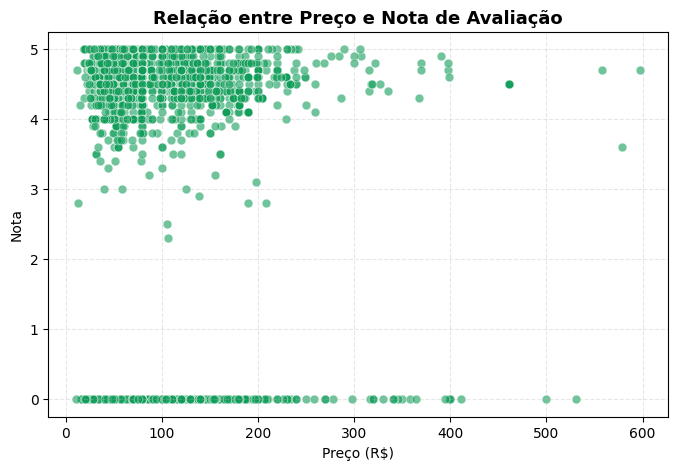

In [174]:
plt.figure(figsize=(8,5))  # Define o tamanho da figura do gráfico
sns.scatterplot(data=df, x='Preço', y='Nota', color='#0F9D58', alpha=0.6, s=40)  # Cria um gráfico de dispersão entre preço e nota de avaliação
plt.title('Relação entre Preço e Nota de Avaliação', fontweight='bold', fontsize=13)  # Define o título do gráfico
plt.xlabel('Preço (R$)', fontsize=10)  # Define o rótulo do eixo X
plt.ylabel('Nota', fontsize=10)  # Define o rótulo do eixo Y
plt.grid(axis='x', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo X
plt.grid(axis='y', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo Y
plt.show()  # Exibe o gráfico


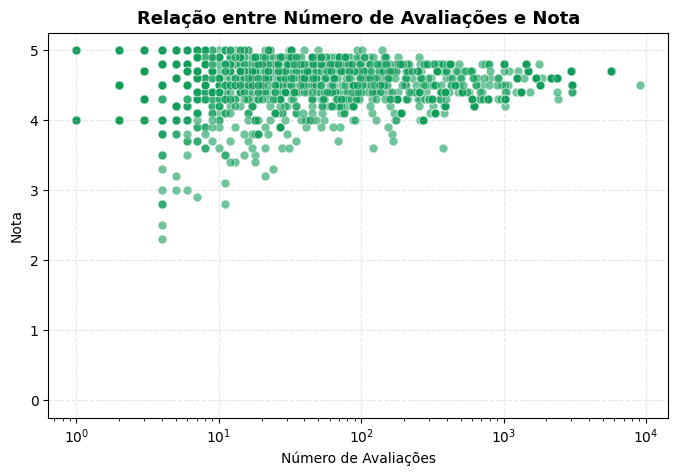

In [175]:
plt.figure(figsize=(8,5))  # Define o tamanho da figura do gráfico
sns.scatterplot(data=df, x='N_Avaliações', y='Nota', color='#0F9D58', alpha=0.6, s=40)  # Cria um gráfico de dispersão entre número de avaliações e nota
plt.xscale('log')  # Define escala logarítmica no eixo X
plt.title('Relação entre Número de Avaliações e Nota', fontweight='bold', fontsize=13)  # Define o título do gráfico
plt.xlabel('Número de Avaliações', fontsize=10)  # Define o rótulo do eixo X
plt.ylabel('Nota', fontsize=10)  # Define o rótulo do eixo Y
plt.grid(axis='x', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo X
plt.grid(axis='y', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo Y
plt.show()  # Exibe o gráfico

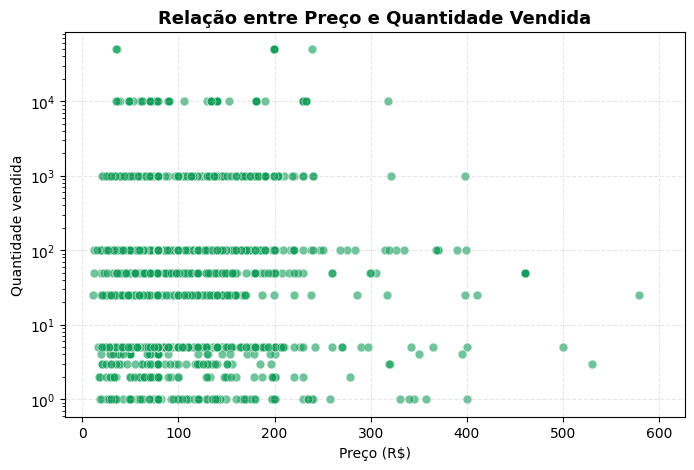

In [176]:
plt.figure(figsize=(8,5))  # Define o tamanho da figura do gráfico
sns.scatterplot(data=df, x='Preço', y='Qtd_Vendidos_Cod', color='#0F9D58', alpha=0.6, s=40)  # Cria um gráfico de dispersão entre o preço e a quantidade vendida
plt.yscale('log')  # Define escala logarítmica no eixo Y
plt.title('Relação entre Preço e Quantidade Vendida', fontweight='bold', fontsize=13)  # Define o título do gráfico
plt.xlabel('Preço (R$)', fontsize=10)  # Define o rótulo do eixo X
plt.ylabel('Quantidade vendida', fontsize=10)  # Define o rótulo do eixo Y
plt.grid(axis='x', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo X
plt.grid(axis='y', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo Y
plt.show()  # Exibe o gráfico


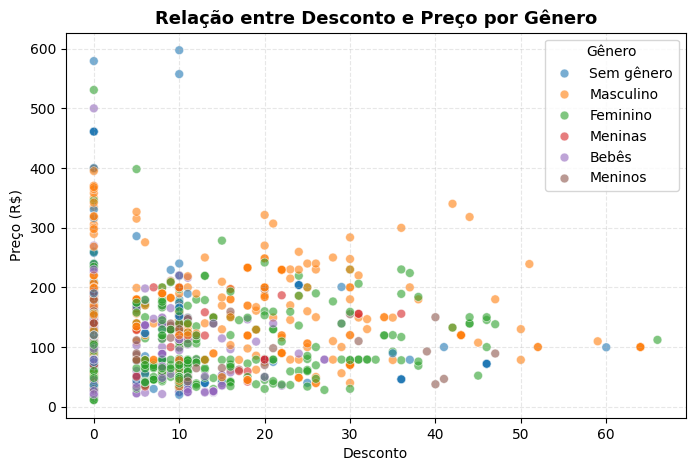

In [177]:
plt.figure(figsize=(8,5))  # Define o tamanho da figura do gráfico
top_generos = df['Gênero'].value_counts().head(6).index  # Seleciona os 6 gêneros mais frequentes
df_plot = df[df['Gênero'].isin(top_generos)].copy()  # Cria uma cópia do DataFrame contendo apenas os gêneros selecionados
sns.scatterplot(data=df_plot, x='Desconto', y='Preço', hue='Gênero', alpha=0.6, s=40)  # Cria um gráfico de dispersão entre desconto e preço, diferenciando os gêneros por cor
plt.title('Relação entre Desconto e Preço por Gênero', fontweight='bold', fontsize=13)  # Define o título do gráfico
plt.xlabel('Desconto', fontsize=10)  # Define o rótulo do eixo X
plt.ylabel('Preço (R$)', fontsize=10)  # Define o rótulo do eixo Y
plt.grid(axis='x', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo X
plt.grid(axis='y', linestyle='--', alpha=.3)  # Adiciona linhas de grade no eixo Y
plt.show()  # Exibe o gráfico

Visualizando os gráficos de dispersão, podemos observar que:

  - Não há correlação clara entre preço e nota, logo produtos caros e baratos recebem notas semelhantes;
  - A maioria das notas está entre 4 e 5, independentemente do preço, sugerindo que o valor do produto não influencia diretamente a avaliação dos consumidores;
  - O gráfico mostra uma leve tendência de aumento na quantidade vendida conforme o desconto cresce, embora não seja uma relação linear forte;
  - Mesmo com descontos altos (acima de 40%), há produtos com poucas vendas, o que sugere que o desconto sozinho não é suficiente para impulsionar as vendas em todos os casos;
  - A maior concentração de pontos ocorre entre 0% e 20% de desconto, faixa na qual também estão os produtos com maior volume de vendas;
  - Esse comportamento indica que, embora promoções atraiam consumidores, outros fatores, como marca, reputação e necessidade do produto também influenciam fortemente as vendas;
  - A maioria dos produtos possui poucas avaliações, concentradas em notas altas (4 a 5);
  - Produtos com muitas avaliações também tendem a manter boas notas, indicando consistência na qualidade percebida e confiança do consumidor;
  - É possível perceber uma tendência negativa entre preço e quantidade vendida, conforme o preço aumenta, a quantidade vendida tende a diminuir;
  - A maioria dos produtos concentra-se na faixa de preços entre R$ 50 e R$ 200, com volumes de venda variando amplamente entre 10 e 10 000 unidades;
  - Há poucos produtos com preços acima de R$ 300, e esses tendem a apresentar baixas vendas, sugerindo sensibilidade do consumidor a preços altos;
  - Descontos estão distribuídos por todas as faixas de preço e gêneros;
  - Em geral, itens masculinos e femininos ocupam toda a faixa de descontos; não há um gênero com “descontos sistematicamente maiores”;


### 4.3 Gráficos de Calor

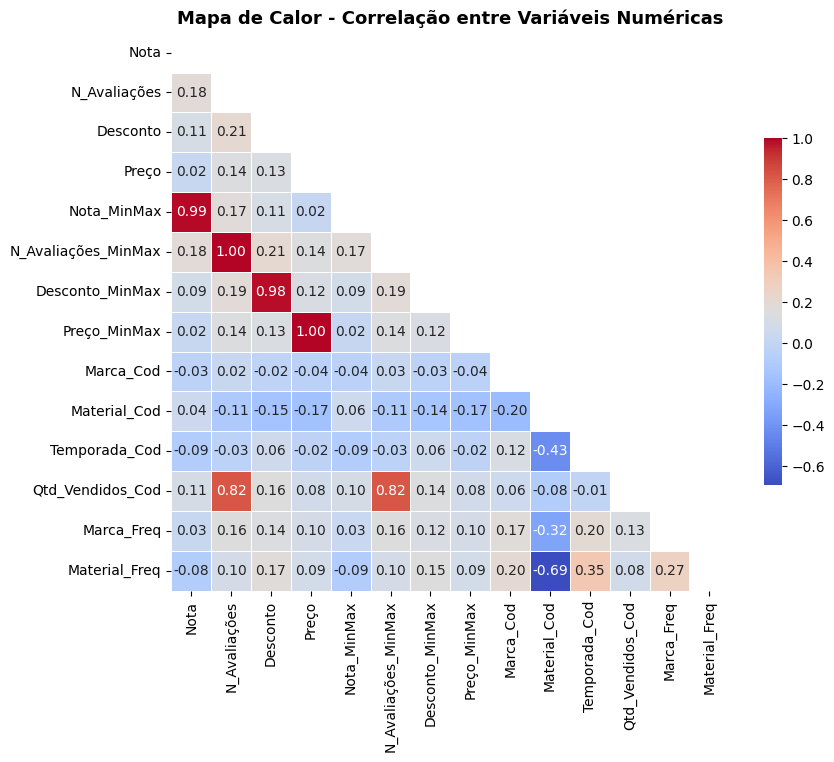

In [179]:
corr = df.corr(numeric_only=True)  # Calcula a matriz de correlação apenas entre colunas numéricas
mask = np.triu(np.ones_like(corr, dtype=bool))  # Cria uma máscara para ocultar a metade superior da matriz (triângulo superior)
plt.figure(figsize=(9,9))  # Define o tamanho da figura do gráfico

ax = sns.heatmap(  # Cria o mapa de calor com as correlações
    corr,
    mask=mask,  # Aplica a máscara para exibir apenas a metade inferior da matriz
    cmap='coolwarm',  # Define a paleta de cores do mapa de calor
    square=True,  # Mantém o formato quadrado das células
    linewidths=.5,  # Define a espessura das linhas que separam as células
    cbar_kws={"shrink": .5},  # Reduz o tamanho da barra de cores lateral
    annot=True,  # Exibe os valores numéricos dentro de cada célula
    fmt=".2f"  # Formata os valores exibidos com duas casas decimais
)

plt.title('Mapa de Calor - Correlação entre Variáveis Numéricas', fontweight='bold', fontsize=13)  # Define o título do gráfico
plt.show()  # Exibe o mapa de calor

 Visualizando o Mapa de Calor, podemos observar que:

  - As maiores correlações são entre as variáveis normalizadas e seus pares originais (exemplo: N_Avaliações e N_Avaliações_MinMax);
  - Preço, Desconto e Nota têm correlações fracas entre si (aproximadamente menor que 0.2), sugerindo relações não lineares;
  - Qtd_Vendidos_Cod tem correlação moderada apenas com N_Avaliações_MinMax (aproximadamente 0.82), indicando que produtos com maior número de avaliações tendem também a registrar mais vendas.


### 4.4 Gráfico de Barras 

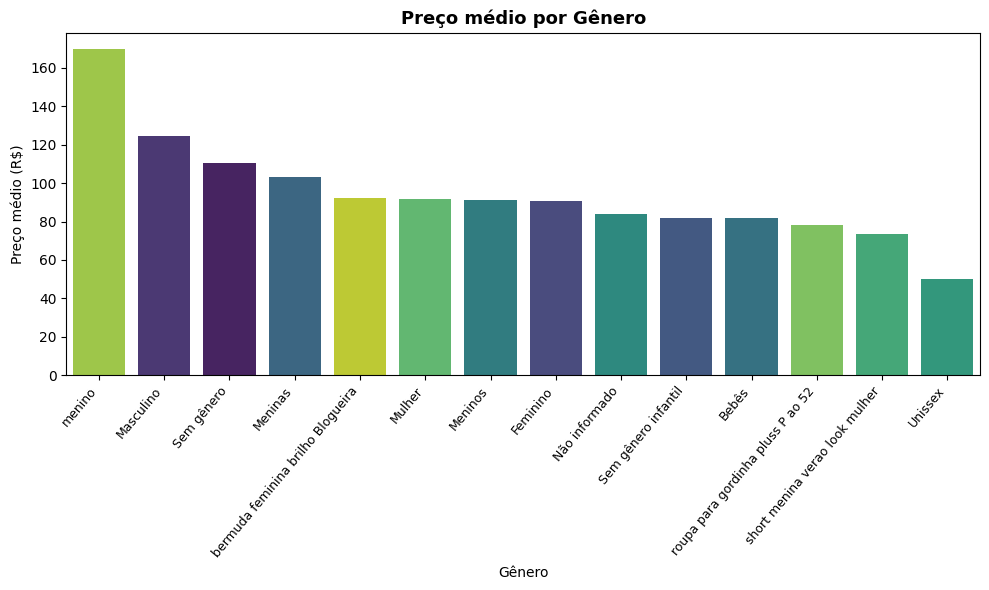

In [154]:
plt.figure(figsize=(10,6))
ordem = df.groupby('Gênero')['Preço'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Gênero', y='Preço', order=ordem, estimator=np.mean,  errorbar=None, hue='Gênero', palette='viridis', legend=False )
plt.title('Preço médio por Gênero', fontweight='bold', fontsize=13)
plt.xlabel('Gênero', fontsize=10);
plt.ylabel('Preço médio (R$)', fontsize=10)
plt.xticks(rotation=50, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


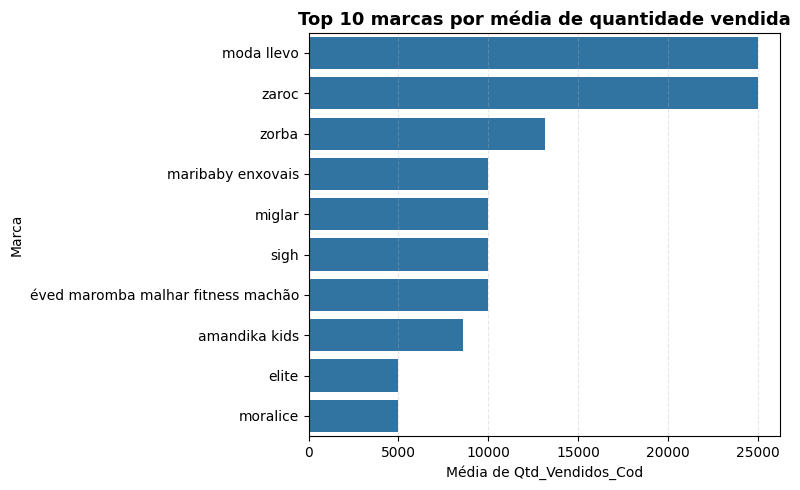

In [155]:
top_marcas = df.groupby('Marca')['Qtd_Vendidos_Cod'].mean().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_marcas.values, y=top_marcas.index, orient='h')
plt.title('Top 10 marcas por média de quantidade vendida', fontweight='bold', fontsize=13)
plt.xlabel('Média de Qtd_Vendidos_Cod', fontsize=10)
plt.ylabel('Marca', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Visualizando os Gráficos de Barras, podemmos observar que:

  - O maior preço médio aparece em “menino” e “masculino”;
  - “unissex” tem o menor preço médio;
  - Diferenças de preço médio entre gêneros podem refletir mix de produtos (tamanho, material, kit, etc.), não apenas o gênero em si;
  - 'moda llevo' e 'zaroc' lideram com folga a média de unidades vendidas, seguidas por 'zorba';
  - O topo concentrado em poucas marcas sugere efeito de portfólio forte ou marketing mais eficientes;
  - As demais marcas apresentam médias bem menores..

### 4.5 Gráfico de Pizza

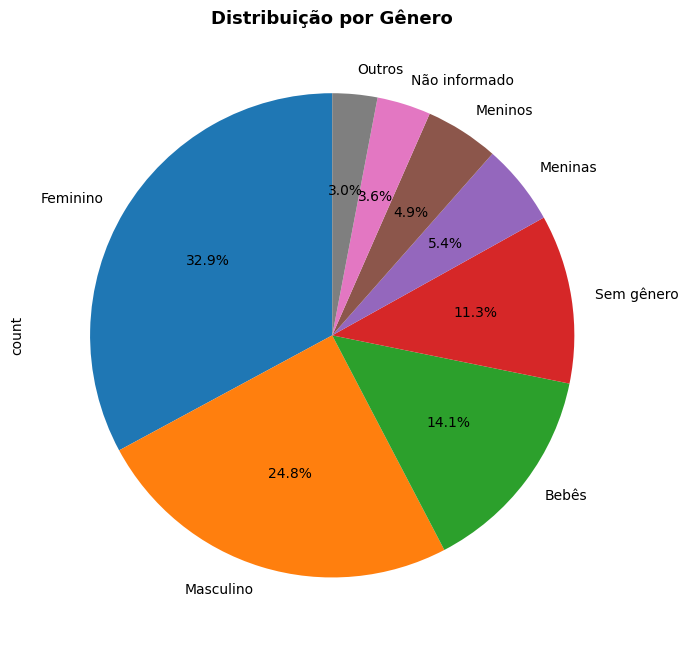

In [36]:
contagem = df['Gênero'].value_counts(normalize=True)
top_generos = contagem[contagem > 0.03].index  # exibe só gêneros com maior de 3% dos produtos

df_pizza = df.copy()
df_pizza['Gênero Agrupado'] = df_pizza['Gênero'].where(df_pizza['Gênero'].isin(top_generos), 'Outros')
plt.figure(figsize=(7,7))
df_pizza['Gênero Agrupado'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
)
plt.title('Distribuição por Gênero', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

Visualizando o Gráfico de Pizza, podemos observar que:

 - A maior parte dos produtos é destinada ao público feminino (32,9%) e masculino (24,8%), somando juntos mais da metade do catálogo;
 - Produtos voltados para bebês (14,1%) também representam uma fatia relevante;
 - Já as categorias “sem gênero” e infantis (“meninos”, “meninas”) aparecem com menor participação;
 - Essa distribuição mostra foco em público adulto, especialmente feminino.

### 4.6 Gráfico de Densidade

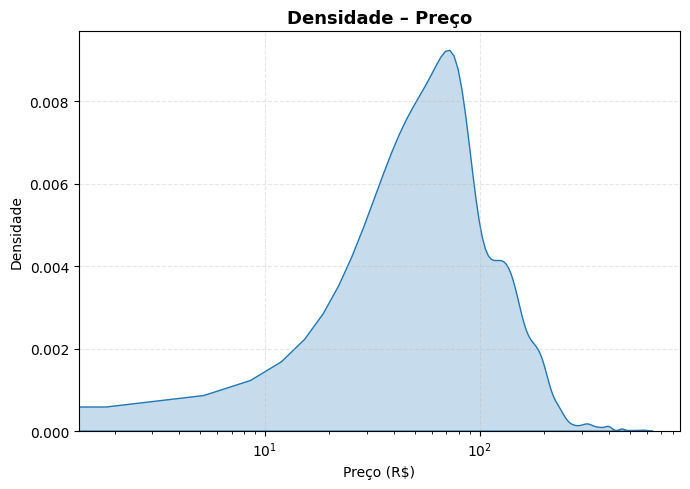

In [47]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x='Preço', fill=True)
plt.xscale('log')
plt.title('Densidade – Preço', fontweight='bold', fontsize=13)
plt.xlabel('Preço (R$)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=.3)
plt.show()

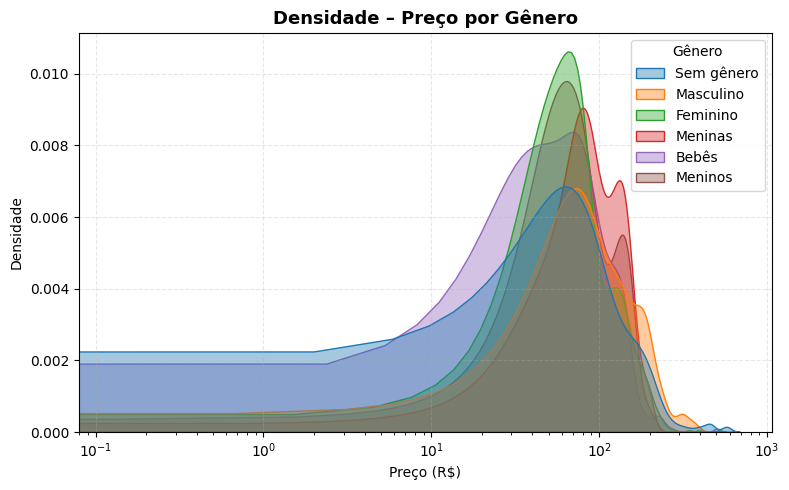

In [48]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Gênero'].isin(top_generos)], x='Preço', hue='Gênero', fill=True, common_norm=False, alpha=0.4)
plt.xscale('log')
plt.title('Densidade – Preço por Gênero', fontweight='bold', fontsize=13)
plt.xlabel('Preço (R$)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=.3)
plt.tight_layout()
plt.show()

Visualizando os Gráficos de Densidade, podemos observar que:

 - A distribuição de preços é assimétrica à direita, com concentração entre `R$50` e `R$150`.
 - Há uma cauda longa de produtos mais caros (acima de `R$300`), indicando que poucos itens elevam o preço máximo.
 - Essa forma sugere que o mercado tem foco em produtos de ticket médio-baixo.
 - Todas as curvas têm comportamento semelhante, com pico de densidade entre `R$50` e `R$150`.
 - Produtos masculinos e para meninos mostram uma leve tendência a preços mais altos.
 - A sobreposição indica que o gênero tem impacto limitado sobre a distribuição geral de preços.

### 4.7 Gráfico de Regressão

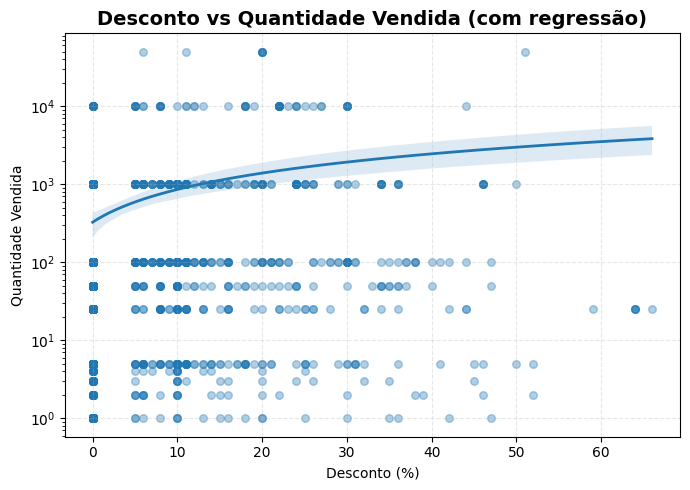

In [49]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df, x='Desconto', y='Qtd_Vendidos_Cod',
    scatter_kws={'alpha':0.35, 's':30}, line_kws={'linewidth':2}
)
plt.yscale('log')
plt.title('Desconto vs Quantidade Vendida (com regressão)', fontweight='bold', fontsize=14, loc='center')
plt.xlabel('Desconto (%)', fontsize=10);
plt.ylabel('Quantidade Vendida', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=.3)
plt.tight_layout()
plt.show()

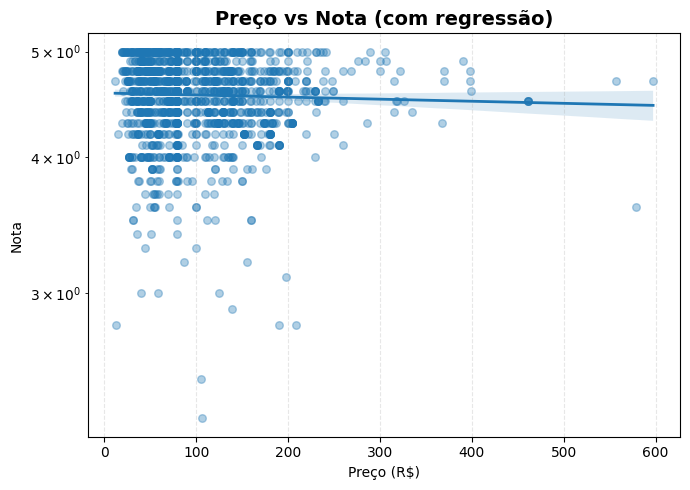

In [50]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df[df['Nota']>0], x='Preço', y='Nota',
    scatter_kws={'alpha':0.35, 's':30}, line_kws={'linewidth':2}
)
plt.yscale('log')
plt.title('Preço vs Nota (com regressão)', fontweight='bold', fontsize=14)
plt.xlabel('Preço (R$)', fontsize=10)
plt.ylabel('Nota', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=.3)
plt.tight_layout()
plt.show()

Visualizando os gráficos de Regressão, podemos observar que:

 - A linha de tendência mostra leve correlação positiva: conforme o desconto aumenta, a quantidade vendida tende a crescer;
 - A dispersão é alta, sugerindo que outros fatores além do desconto também influenciam as vendas;
 - A linha de regressão para Preços vs Nota é praticamente horizontal, com leve inclinação negativa;
 - Isso indica que o preço não tem relação significativa com a avaliação dos clientes.

## 5. Insights

De acordo com os gráficos as visualizações acima, podemos dizee que:

 - Distribuições: variáveis numéricas são assimétricas à direita. Há muitos produtos com valores baixos e poucos outliers (preço, desconto, avaliações). Nota concentra-se entre 4 e 5.
 - Preço x Nota: relação praticamente nula. Produtos caros e baratos recebem notas semelhantes, percepção de qualidade importa mais que preço.
 - Desconto x Vendas: tendência positiva, porém fraca e não linear. A maioria dos volumes está com 0 e 20% de desconto, ou seja, só o desconto não garante alta venda.
 - Preço x Vendas: relação inversa (mais baratos tendem a vender mais), mas existem exceções (itens caros com bom volume, provável efeito de marca).
 - Avaliações: itens com mais avaliações costumam manter notas altas, sugerindo confiança/qualidade consistente.
 - Correlações: fortes apenas entre variáveis normalizadas e seus originais. Qtd_Vendidos (ou Cod) tem correlação moderada com N_Avaliações (aproximadamente 0,8), demais relações são fracas.
 - Gênero: distribuição de preços semelhante entre grupos. Os gêneros masculino e menino são levemente mais caros. Já para feminino e masculino domina o catálogo.
 - Marcas: poucas marcas concentram a média de unidades vendidas, efeito de marketing.